#  How to Wield the Working Model to Increase your Rankings.



<img src = "hn-logo.png" style="width:400px;height:300px" vspace = "40"/>


**Determine a system that places an individual post agmonst the highest ranks**

The [Hacker News](https://news.ycombinator.com/ask) community group provides an outlet for indivduals from different backgrounds in tech to communicate and share ideas. The premise of this model is supported by a voting system of 'upvotes' and 'downvotes'. Where each link is ranked on the main page based off its total votes.

In this project, I will discuss two primary facets that may affect the chance each individual link may have of being ranked the highest. I am specifically sourcing data from any/all records that include 'Ask HN' or 'Show HN' only. The rest will be removed.


**Import Hacker News Dataset**

Import the Hacker News dataset, this data is publicly available in the project folders. Approximately 20,000 records have been previously cleaned all of which require `num_comments` as a criteria. This field description can also be found [here](README.md) in the project folder along with the other columns. We will begin by reading the data into our Notbook and seperating the list accordingly.

In [354]:
#Import reader from csv
from csv import reader

#Open the file and import the dataset as a list of list
open_file = open(r"C:\Users\Dell User\Documents\Hacker_News\HackerNews_posts_year_to_Sep_26_2016.csv", encoding='utf-8')
read_file = reader(open_file)
hn_hd = list(read_file)

#Extract the Headers from the list and create two separate list
hd = hn_hd[:1]
hn = hn_hd[1:]

#Results
print(hd)
print("\n")
print(hn[:3])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']]


[['12579008', 'You have two days to comment if you want stem cells to be classified as your own', 'http://www.regulations.gov/document?D=FDA-2015-D-3719-0018', '1', '0', 'altstar', '9/26/2016 3:26'], ['12579005', 'SQLAR  the SQLite Archiver', 'https://www.sqlite.org/sqlar/doc/trunk/README.md', '1', '0', 'blacksqr', '9/26/2016 3:24'], ['12578997', 'What if we just printed a flatscreen television on the side of our boxes?', 'https://medium.com/vanmoof/our-secrets-out-f21c1f03fdc8#.ietxmez43', '1', '0', 'pavel_lishin', '9/26/2016 3:19']]


**Filter Title Data**

Once the data has been split into column headers and its' data it is now time to seperate the records corresponding to the type of post. As previously mentioned above, the only records which pertain to this project will be the ones that start with 'Ask HN' or 'Show HN' in the `title` column. Apart from the filtered data lets calculate the average number of comments for each type post.

In [666]:
#List temporary variables
total_ask_comments = 0
total_show_comments = 0
total_other_comments = 0

#Create an empty list to separate three different types of post
ask_post = []
show_post = []
other_post = []

#Loop through the original dataset - convert each title to a lowercase string and compare - calculate the average number of comments for each of the three types of post
for row in hn:
    title = row[1].lower()
    num_comment = int(row[4])
    if title.startswith('ask hn'):
        ask_post.append(row)
        total_ask_comments += num_comment
    elif title.startswith('show hn'):
        show_post.append(row)
        total_show_comments += num_comment
    else:
        other_post.append(row)
        total_other_comments += num_comment

#Calculate the average number of comments for each type of posting ('Ask HN' or 'Show HN')
average_num_ask_comments = total_ask_comments/len(ask_post)
average_num_show_comments = total_show_comments/len(show_post)

#Results
print("Ask HN \n\n" + str(ask_post[:3]))
print("\nAverage: " + str(round(average_num_ask_comments, 2)))

print("\nShow HN \n\n" + str(show_post[:3]))
print("\nShow HN: " + str(round(average_num_show_comments, 2)))



Ask HN 

[['12578908', 'Ask HN: What TLD do you use for local development?', '', '4', '7', 'Sevrene', '9/26/2016 2:53'], ['12578522', 'Ask HN: How do you pass on your work when you die?', '', '6', '3', 'PascLeRasc', '9/26/2016 1:17'], ['12577908', 'Ask HN: How a DNS problem can be limited to a geographic region?', '', '1', '0', 'kuon', '9/25/2016 22:57']]

Average: 10.39

Show HN 

[['12578335', 'Show HN: Finding puns computationally', 'http://puns.samueltaylor.org/', '2', '0', 'saamm', '9/26/2016 0:36'], ['12578182', 'Show HN: A simple library for complicated animations', 'https://christinecha.github.io/choreographer-js/', '1', '0', 'christinecha', '9/26/2016 0:01'], ['12578098', 'Show HN: WebGL visualization of DNA sequences', 'http://grondilu.github.io/dna.html', '1', '0', 'grondilu', '9/25/2016 23:44']]

Show HN: 4.89


**Explore Filterd Data and the Number of Comments**

Given the average for post that begin with 'Ask HN' being approximately 11 and post that begin with 'Show HN' being approximately 5. Lets take a closer look into the distribution of all the posts and comments being considered. Consequently, in the next code block, well:
* Create an empty list for each type of posting and extract the value from the `num_comments`column.
* Create an empty dictionary for each type of posting to determine how frequent a post with certain number of comments appears.
* Create a function to sort that table in a ascending manner.
* Display the number of total, 'Ask Hn', 'Show HN', and other posts.

In [668]:
#Create an empty list to store the number of comments for each 'Ask HN' post - Loop through original dataset and extract each value.
num_ask_comment = []
for i in ask_post:
    num_ask_comment.append(i[3])

#Create an empty list to store the number of comments for each 'Show HN' post - Loop through original dataset and extract each valu.
num_show_comment = []
for i in show_post:
    num_show_comment.append(i[3])

#Create an empty dictionary to store the frequency of each 'Ask HN'comment
ask_comment_dict = {}
for i in num_ask_comment:
    i = int(i)
    if i not in ask_comment_dict:
        ask_comment_dict[i] = 1
    else:
        ask_comment_dict[i] += 1
        
        
#Create an empty dictionary to store the frequency of each 'Show HN'comment     
show_comment_dict = {}
for i in num_show_comment:
    i = int(i)
    if i not in show_comment_dict:
        show_comment_dict[i] = 1
    else:
        show_comment_dict[i] += 1
        
        
#Function will print ascending dictionary if value is True or descending dictionary dictionary if value is False
def dict_order(value, dictionary):
    if value == True:
        asc_sort = list(dictionary.items())
        asc_sort.sort()
        asc_order = dict(asc_sort)
        dictionary = asc_order
    else:
        desc_sort = list(dictionary.items())
        desc_sort.sort(reverse = True)
        desc_order = dict(desc_sort)
        dictionary = desc_order
    return dictionary
 
#Results
total = len(ask_post) + len(show_post) + len(other_post) 
print("Number of post that Ask Hacker News: " + str(len(ask_post)))
print("Number of post that Show Hacker News: " + str(len(show_post)))
print("Number of post that are neither nor: " + str(len(other_post)))
print("Number of total post in dataset: " + str(total))


Number of post that Ask Hacker News: 9139
Number of post that Show Hacker News: 10158
Number of post that are neither nor: 273822
Number of total post in dataset: 293119


Lets use the functions and dictionaries above to explore the data a bit further. Immediately its apparent from our last set of results that there are more post that begin with 'Show HN'. One might conclude that this data alone gives proper representation to the fact that 'Show HN' postings often do better than 'Ask HN' which I believe is inherently false. Instead, its only safe to say that more people prefer to share their personal work as opposed to asking questions or 'text submissions.'

**Frequency Tables for each Type of Post**

Lets take the distribution for each and visually open up the data and explore it even further. A requirement from Hacker News states that a total number of at least 100 comments is necessary for one to reach the top of the website's board. So, lets keep that in mind in our discovery.  Below we will create a dictionary of ranges to determine what ranges of post produce a certain number of comments. 

In [656]:
#Import pandas dataframe package
import pandas as pd

#Sort dictionary in ascending order
sort_swap_ask_comment_dict = dict_order(True, ask_comment_dict)
sort_swap_show_comment_dict = dict_order(True, show_comment_dict)

#For each type of Post, convert to a python list
num_comments_list_ask = list(sort_swap_ask_comment_dict.keys())
num_post_list_ask = list(sort_swap_ask_comment_dict.values())

num_comments_list_show = list(sort_swap_show_comment_dict.keys())
num_post_list_show = list(sort_swap_show_comment_dict.values())


#Convert the frequency table into pandas and display the results as a dataframe
print("Ask HN")
pd.DataFrame(data = {'Number of Comments': num_comments_list_ask, 'Number of Posts': num_post_list_ask})

Ask HN


,Number of Comments,Number of Posts
0,1,2515
1,2,1953
2,3,1095
3,4,642
4,5,428
...,...,...
227,648,1
228,691,1
229,822,1
230,867,1


In [520]:
print("Show HN")
pd.DataFrame(data = {'Number of Comments': num_comments_list_show, 'Number of Posts': num_post_list_show})

Show HN


,Number of Comments,Number of Posts
0,1,1895
1,2,2030
2,3,1393
3,4,923
4,5,570
...,...,...
268,893,1
269,1004,1
270,1093,1
271,1172,1


**Define the Percentages**

Previously we mentioned that 100 comments was the bar set in order to make it to the top page so lets break down each table in terms of percentages and display the results. What percentage of posts from each of the three types (we will include 'Other' as well) received at least 100 comments?

<function matplotlib.pyplot.show(*args, **kw)>

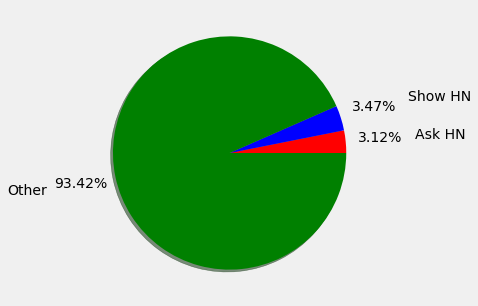

In [521]:
#Display the percentage of 'Ask HN', 'Show HN' and 'Other' posts
ask_per = len(ask_post)/total * 100
show_per = len(show_post)/total * 100
other_per = len(other_post)/total * 100

#Graph the percentage of each of the three type of posts
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.pie([ask_per, show_per, other_per], labels = ['Ask HN', 'Show HN', 'Other'], colors = ['r', 'b', 'g'], autopct='%.2f%%', pctdistance = 1.3, shadow=True, labeldistance = 1.6)
plt.show

From the graph above lets remove "Other" post from the equation until we are able to explore that data seperately.

<function matplotlib.pyplot.show(*args, **kw)>

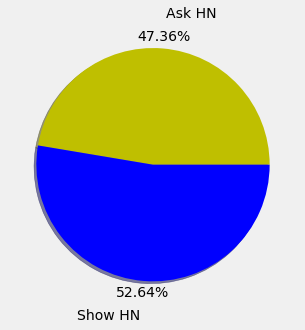

In [522]:
#Display the percentage of 'Ask HN' and 'Show HN' posts
new_total = len(ask_post) + len(show_post)
ask_per_2 = len(ask_post)/new_total * 100
show_per_2 = len(show_post)/new_total * 100

#Graph the percentage of each of the two type of posts
plt.figure(figsize=(5,5))
plt.pie([ask_per, show_per], labels = ['Ask HN', 'Show HN'], colors = ['y', 'b'], autopct='%.2f%%', pctdistance = 1.1, shadow=True, labeldistance = 1.3)
plt.show

The difference between the two post are relatively the same. Lets continue looking at the different percentages to determine if there is a distinction between the two posts that seperate the values further and further apart. Remember, for a post to make the front page, a post needs at least 100 comments. So lets find the percentage of comments that have at least 100 comments available.  

In [523]:
#Count the percentage of 'Ask HN'and 'Show HN' posts available with more than 100 comments
count_ask = 0
dict_keys = ask_comment_dict.keys()
for item in dict_keys:
    if item >= 100:
        count_ask += ask_comment_dict[item]

count_show = 0
dict_keys = show_comment_dict.keys()
for item in dict_keys:
    if item >= 100:
        count_show += show_comment_dict[item]

#Count the total number of 'Ask HN' and 'Show HN' post to determine percentage of posts greater than 100 comments
total_ask_post = 0
for i in ask_comment_dict.values():
    total_ask_post += i

total_show_post = 0
for i in show_comment_dict.values():
    total_show_post += i

#Calculate the percentages of both types of post with at least 100 commments
per_greater_100_ask = count_ask/total_ask_post 
print("Ask HN: " + "{:.2%}".format(per_greater_100_ask))
 
per_greater_100_show = count_show/total_show_post 
print("Show HN: " + "{:.2%}".format(per_greater_100_show))


Ask HN: 2.08%
Show HN: 3.08%


**Explore Time Related Data**

Given the low percentages, one might conclude that the type of posts alone that make it to the top of the page are not a considerable factor in ranking very high. I believe with an average of around 12 comments per posts the odds are not very high. Lets consider another factor in the dataset, lets look at the `created_at` column. We will begin by extracting the time that  each post was created and at and seperating the data. 

In this portion of the project, I will look for patterns in the data that will allow me to form a conclusion around the best and worst times to post on the webpage. Lets begin by importing the datetime library to preform our analysis. Following the first step I will will calculate the amount of post created in each hour of the day, along with the number of comments. To finish, I want to find the average number of comments received in every hour.

In [648]:
#Import datatime library
import datetime as dt

print(ask_post[0])
#Create an empty list to store the number of comments and datetime
result_list_ask = []
result_list_show = []

#Loop through the 'Ask HN' and 'Show HN' list and append the datetime and the number of comments to an empty list
for i in ask_post:
    start_time = i[6]
    comment_num = i[4]
    result_list_ask.append([comment_num, start_time])
    
for i in show_post:
    start_time = i[6]
    comment_num = i[4]
    result_list_show.append([comment_num, start_time])
    

['12578908', 'Ask HN: What TLD do you use for local development?', '', '4', '7', 'Sevrene', '9/26/2016 2:53']


In [654]:
#Create an empty dictionary to store the number of comments and counts by hour
count_hour = {}
comment_hour = {}

#Extract the date and time and create a time object
for i in result_list_ask:
    datetime_ask = i[1]
    #print(datetime_ask)
    datetime_ask = datetime_ask.split()
    time_ask_obj = dt.datetime.strptime(datetime_ask[1], "%H:%M")
   #print(time_ask_obj)

print("\n\n\n\n")
    
for i in result_list_show:
    datetime_show = i[1]
    #print(datetime_ask)
    datetime_show = datetime_show.split()
    time_show_obj = dt.datetime.strptime(datetime_show[1], "%H:%M")
   #print(time_show_obj)  
    
#datetime_ask = datetime_ask[1]
#ask_hour = datetime_ask.split(" ", [1])
#print((result_list_ask[0])[1])